<a href="https://colab.research.google.com/github/yassine-ISAOUY/Python-for-Data-Science/blob/master/reconnaissance_contenu_violent_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from google.colab import drive
drive.mount('/content/gdrive')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("/content/gdrive/My Drive/Colab Notebooks/Projet Machine Learning/violencePic"))

# Any results you write to the current directory are saved as output.

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
['.DS_Store', 'violence', 'no violence']


In [0]:
import keras
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import warnings
warnings.filterwarnings("ignore")
from keras.layers import Dense,Convolution2D,Dropout,MaxPooling2D,BatchNormalization,Flatten
from keras.models import Sequential,Model
from keras.preprocessing.image import ImageDataGenerator

Found 586 images belonging to 2 classes.
[0. 1.]


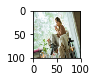

[1. 0.]


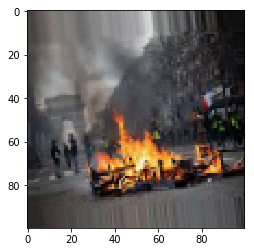

[1. 0.]


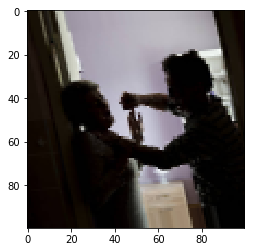

[1. 0.]


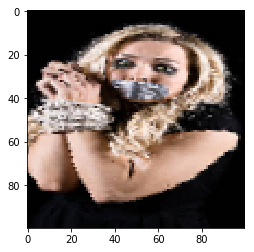

[0. 1.]


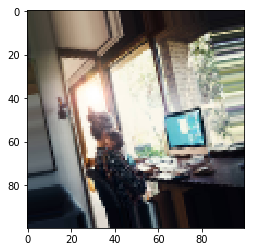

[0. 1.]


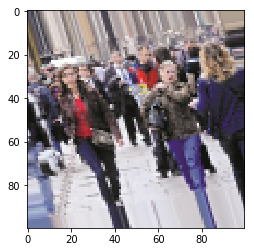

[1. 0.]


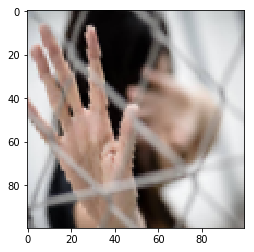

[1. 0.]


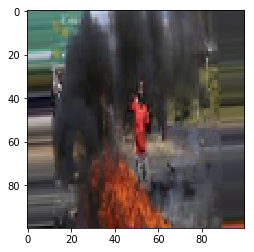

[0. 1.]


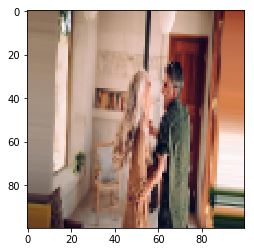

[1. 0.]


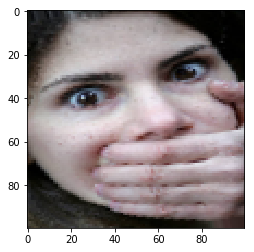

[0. 1.]


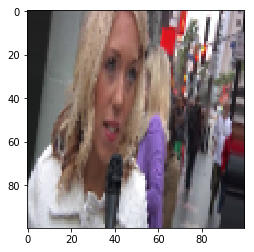

[0. 1.]


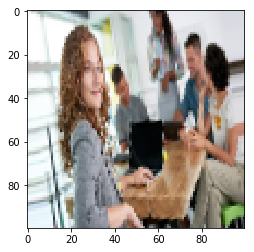

In [86]:
path ="/content/gdrive/My Drive/Colab Notebooks/Projet Machine Learning/violencePic"
data = ImageDataGenerator(rescale = 1./255, zoom_range = 0.3,horizontal_flip=True,rotation_range= 15).flow_from_directory(path,target_size= (100,100),color_mode= "rgba",classes= ["violence","no violence"],batch_size=90)
print(data)
x,y = data.next()
plt.subplot(4,3,2)
for i in range(0,12):
    image = x[i]
    label = y[i]
    print (label)
    plt.imshow(image)
    plt.show()

In [0]:
IMG_SIZE = 100
new_array = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
# Defining the Sequential model
model= Sequential()


In [0]:
#Adding up the layers of the network
model.add(Convolution2D(32,(3,3),input_shape=(100,100,4),padding = "Same",activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
#model.add(Dropout(0.2))
model.add(Convolution2D(32,(3,3),padding = "Same",activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
#model.add(Dropout(0.2))
model.add(Convolution2D(64,(3,3),padding = "Same",activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
#model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(2,activation="softmax"))

In [0]:
# Implementing the callback function so as to stop the algorithm from the furthur traning in case the accuracy dips down
clbk= keras.callbacks.EarlyStopping(monitor='accuracy',mode='min')

In [0]:
#Cmpiling the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [98]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 100, 100, 32)      1184      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 33, 33, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 33, 33, 32)        9248      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 576)               0         
__________

In [99]:
history_1 = model.fit_generator(data,steps_per_epoch=586/20,epochs=10,shuffle=False,callbacks=[clbk])

Epoch 1/10
30/29 [==============================] - 53s 2s/step - loss: 0.6381 - acc: 0.6288
Epoch 2/10
30/29 [==============================] - 51s 2s/step - loss: 0.5532 - acc: 0.7218
Epoch 3/10
30/29 [==============================] - 52s 2s/step - loss: 0.5294 - acc: 0.7333
Epoch 4/10
30/29 [==============================] - 52s 2s/step - loss: 0.4981 - acc: 0.7633
Epoch 5/10
30/29 [==============================] - 52s 2s/step - loss: 0.4733 - acc: 0.7692
Epoch 6/10
30/29 [==============================] - 51s 2s/step - loss: 0.4523 - acc: 0.7897
Epoch 7/10
30/29 [==============================] - 52s 2s/step - loss: 0.4528 - acc: 0.7776
Epoch 8/10
30/29 [==============================] - 53s 2s/step - loss: 0.4285 - acc: 0.8028
Epoch 9/10
30/29 [==============================] - 51s 2s/step - loss: 0.3966 - acc: 0.8191
Epoch 10/10
30/29 [==============================] - 53s 2s/step - loss: 0.4132 - acc: 0.8142


In [100]:
history_1.history

{'acc': [0.6279714814551092,
  0.7177419343783009,
  0.7325673555798841,
  0.7630744839526961,
  0.769413632041112,
  0.7907258019331963,
  0.7765451642771719,
  0.8026941335050126,
  0.8185483812324462,
  0.813391431008957],
 'loss': [0.6375781780377432,
  0.5569959753703686,
  0.5304355533489523,
  0.4965501536280153,
  0.4719365280469888,
  0.45018838158538266,
  0.45572748619667514,
  0.42529416634522604,
  0.39869470069966007,
  0.41015085887323277]}

In [0]:
model.save("Mymodel_1.py")
loss= history_1.history["loss"]
acc= history_1.history["acc"]

Text(0.5, 1.0, 'Loss progression curve')

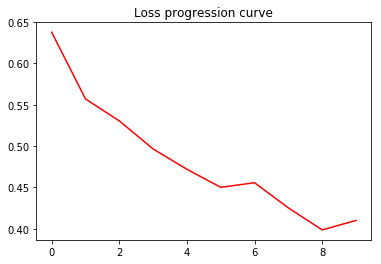

In [109]:
# Plotting the model loss
plt.plot(loss,color="r")
plt.title("Loss progression curve")


Text(0.5, 1.0, ' Accuracy progression curve')

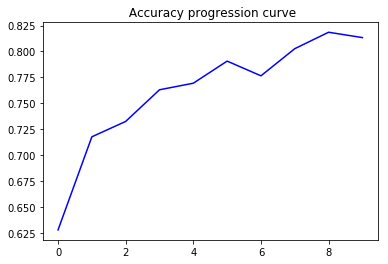

In [105]:
# Plotting the model accuracy
plt.plot(acc,color="b")
plt.title(" Accuracy progression curve")

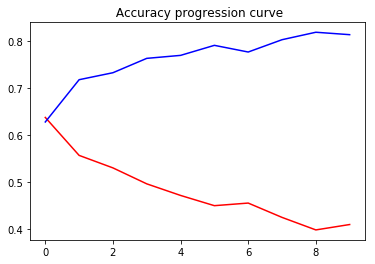

In [110]:
# Plotting the model
plt.plot(loss,color="r")
plt.title("Loss progression curve")
plt.plot(acc,color="b")
plt.title(" Accuracy progression curve")
plt.show()